In [1]:
import numpy as np
import neuraltda.topology3 as tp3
import matplotlib.pyplot as plt
%matplotlib inline

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
kwikfile = '/home/brad/experiments/B1146/sorted/block-4-AP-2300-ML-400-Z-1750/experiment1_101.kwik'
kwikfile = '/home/brad/experiments/B1424/B1424-block-4-AP-2500-ML-500-Z-1000/experiment1_101.kwik'
kwikfile='/home/brad/experiments/B1424/B1424-block-6-AP-2500-ML-500-Z-1500/experiment1_101.kwik'
spikes = tp3.kwik_get_spikes(kwikfile)
trials = tp3.kwik_get_trials(kwikfile)
    

In [6]:
def get_stim_trials(trials, stim_name):
    ''' Return list of all trials for a particular stimulus'''
    stim_trials = [x for x in trials if x[0]==stim_name]
    return stim_trials

def get_unit_trial_spiketrains(spikes, trials, unit):
    ''' Return list of spiketrains from a particular unit for each trial in trials'''
    ret = []
    for trial in trials:
        trial_spikes = tp3.get_spikes_in_interval(spikes, trial[1], trial[2])
        unit_trial_spikes = [x for x in trial_spikes if x[1] == unit]
        ret.append(unit_trial_spikes)
    return ret
        


17


17

In [ ]:
def get_trial_spiketrains(spikes, trials, padding_secs, fs):
    ''' Organize all trials into a dictionary:
    trial_spiketrains[stim] = list of spiketrains
    '''
    trial_spiketrains = {}
    for trial in trials:
        
        stim_name = trial[0]
        stim_start = trial[1]
        stim_end = trial[2]
        
        padding_samps = np.round(padding_secs*fs)
        trial_start = np.amax([0, stim_start - padding_samps])
        trial_end = stim_end + padding_samps
        
        trial_spikes = []
        tp3.spikes_in_interval(spikes, trial_start, trial_end, trial_spikes)
        if stim_name not in trial_spiketrains.keys():
            trial_spiketrains[stim_name] = []
        trial_spiketrains[stim_name].append((trial_start, trial_end, stim_start, stim_end, trial_spikes))
    return trial_spiketrains

from itertools import groupby

def spike_id(spike):
    return spike[1]

def spike_time(spike):
    return spike[0]

def get_unit_spike_times(spikes):
    ''' organize spikes into a list of units and a list of spiketimes'''
    sorted_spikes = sorted(spikes, key=spike_id)
    spiketimes = []
    units = []
    for k, g in groupby(sorted_spikes, spike_id):
        unit_spiketimes = [x[0] for x in g]
        spiketimes.append(unit_spiketimes)
        units.append(k)
    return (units, spiketimes)

In [ ]:
trial_spiketrains = get_trial_spiketrains(spikes, trials, 2, 30000)

In [ ]:
test_spikes = trial_spiketrains['rmp5ms_180-12.wav.sine'][10][-1]

stim_start, stim_end = trial_spiketrains['rmp5ms_180-12.wav.sine'][10][2:4]
print(stim_start, stim_end)
units, spiketimes = get_unit_spike_times(test_spikes)
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(1,1,1)
raster = ax.eventplot(spiketimes, lineoffsets=units, color='k')
ax.axvline(stim_start, color='r')
ax.axvline(stim_end, color='r')
ax.set_xlim([])

In [ ]:


for stim in trial_spiketrains.keys():
    trial_start, trial_end, stim_start, stim_end, trial_spikes = trial_spiketrains[stim][0]
    units, spiketimes = get_unit_spike_times(trial_spikes)
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(1,1,1)
    raster = ax.eventplot(spiketimes, lineoffsets=units, color='k')
    ax.axvline(stim_start, color='r')
    ax.axvline(stim_end, color='r')
    ax.set_xlim([trial_start, trial_end])
    ax.set_ylim([np.amin(units), np.amax(units)])

ValueError: positions cannot be an array with more than one dimension.

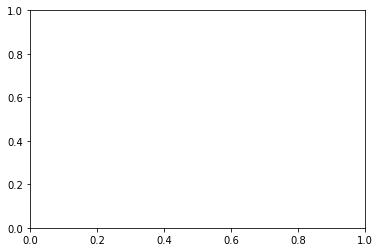

In [7]:
test = get_stim_trials(trials, 'rmp5ms_181-15.wav.sine')

test = get_unit_trial_spiketrains(spikes, test, 3)
spiketimes = [[x[1]]]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
raster = ax.eventplot(test, lineoffsets=range(len(test)), color='k')

In [8]:
test

[[(710259, 3),
  (936482, 3),
  (958328, 3),
  (1125249, 3),
  (1126350, 3),
  (1150802, 3),
  (1165302, 3),
  (1366229, 3),
  (1547236, 3),
  (1576830, 3),
  (1705446, 3),
  (1817275, 3),
  (1882910, 3),
  (1887729, 3)],
 [(26635440, 3),
  (26718041, 3),
  (26940601, 3),
  (26941297, 3),
  (26945021, 3),
  (26953248, 3),
  (27036340, 3),
  (27117442, 3),
  (27433702, 3),
  (27439734, 3),
  (27443274, 3),
  (27444331, 3),
  (27448575, 3),
  (27587501, 3),
  (27838725, 3),
  (28227225, 3)],
 [(78961701, 3),
  (79023039, 3),
  (79026733, 3),
  (79032418, 3),
  (79037255, 3),
  (79062127, 3),
  (79065287, 3),
  (79082000, 3),
  (79089661, 3),
  (79090147, 3),
  (79091592, 3),
  (79093463, 3),
  (79104004, 3),
  (79121002, 3),
  (79122509, 3),
  (79123729, 3),
  (79149459, 3),
  (79178611, 3),
  (79183871, 3),
  (79188851, 3),
  (79194965, 3),
  (79198954, 3),
  (79427115, 3),
  (79428508, 3),
  (79452147, 3),
  (79476142, 3),
  (79482678, 3),
  (79498010, 3),
  (79498971, 3),
  (79509605,